In [ ]:
!nvidia-smi

Mon May  8 10:52:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 1. IMPORTACIÓN LIBRERIAS.

Este bloque de código importa las bibliotecas necesarias para la implementación del modelo de red neuronal convolucional (CNN) usando TensorFlow.

-import tensorflow as tf: Importa la biblioteca principal de TensorFlow para la creación y entrenamiento de modelos de aprendizaje profundo.

-import io: Proporciona funciones de entrada/salida para trabajar con objetos bytes y unicode.

-from tensorflow.keras.datasets import cifar100: Importa el conjunto de datos CIFAR-100, que es un conjunto de imágenes etiquetadas para clasificación.

-from tensorflow.keras.models import Sequential: Importa la clase Sequential para crear modelos de aprendizaje profundo de forma secuencial.

-from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout: Importa varias capas de red neuronal que se pueden apilar juntas para crear modelos complejos.

-from tensorflow.keras.losses import categorical_crossentropy: Importa la función de pérdida categorical_crossentropy, que se utiliza comúnmente en problemas de clasificación de varias clases.

-from tensorflow.keras.optimizers import Adam: Importa el optimizador Adam, que es un algoritmo de optimización popular utilizado para entrenar modelos de aprendizaje profundo.

-from tensorflow.keras.utils import to_categorical: Importa la función to_categorical, que se utiliza para convertir las etiquetas de clase en vectores binarios para la clasificación.

-from tensorflow.keras.callbacks import Callback, EarlyStopping: Importa varios callbacks que se pueden utilizar durante el entrenamiento de modelos, como Callback y EarlyStopping.

-from keras.applications.resnet import ResNet50: Importa la arquitectura ResNet50, que es un modelo pre-entrenado popular utilizado para la clasificación de imágenes.

-from keras.preprocessing.image import ImageDataGenerator: Importa una herramienta de preprocesamiento de imágenes que se puede utilizar para aumentar los datos y mejorar el rendimiento del modelo.

-import matplotlib.pyplot as plt: Importa la biblioteca de trazado de gráficos Matplotlib para visualizar los datos y los resultados del modelo.

-import numpy as np: Importa la biblioteca NumPy para el cálculo numérico y el manejo de matrices.-

In [ ]:

import tensorflow as tf
import io


from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, EarlyStopping
from keras.applications.resnet import ResNet50
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


este fragmento de código imprime el número de GPUs disponibles en el sistema, lo que es útil para determinar si se puede utilizar la aceleración de hardware para el entrenamiento de modelos de aprendizaje profundo en TensorFlow.

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


### 2.Carga de DataSet

Este código carga el conjunto de datos CIFAR-100 utilizando el método load_data() de Keras, y lo divide en conjuntos de entrenamiento y prueba. cifar100 es el conjunto de datos que se va a cargar, y se almacena en las variables (X_train, Y_train) y (X_test, Y_test). X_train y X_test son los datos de imagen, mientras que Y_train e Y_test son las etiquetas correspondientes a cada imagen.

In [ ]:
#Cargando dataset utilizando CIFAR100

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')



169001437/169001437 [==============================] - 4s 0us/step


### 3. Preparacion de datos a normalizar.

 se filtran y preprocesan un conjunto de datos de imágenes etiquetadas para una tarea de clasificación de múltiples clases en TensorFlow.

classes_of_interest = range(10): Es una lista de enteros que representa las clases de interés para la tarea de clasificación. En este ejemplo, se seleccionan las primeras 10 clases.

train_idxs y test_idxs: Son listas de índices de las imágenes de entrenamiento y prueba que pertenecen a las clases de interés.

x_train, y_train, x_test y y_test: Son los datos de imágenes y etiquetas de entrenamiento y prueba. Los índices de las imágenes que pertenecen a las clases de interés se filtran y se asignan a estas variables.

nb_classes = len(np.unique(y_train)): Calcula el número de clases únicas en los datos de entrenamiento.

x_train = x_train.astype('float32') / 255 y x_test = x_test.astype('float32') / 255: Normaliza los valores de los píxeles de las imágenes para que estén en el rango de 0 a 1.

y_train = to_categorical(y_train, len(classes_of_interest)) y y_test = to_categorical(y_test, len(classes_of_interest)): Convierte las etiquetas de clase en vectores binarios para la clasificación.

In [ ]:
#Prepararar las variables de entrada y salida.

classes_of_interest = range(10)
train_idxs = [i for i, label in enumerate(y_train) if label in classes_of_interest]
test_idxs = [i for i, label in enumerate(y_test) if label in classes_of_interest]
x_train = x_train[train_idxs]
y_train = y_train[train_idxs]
x_test = x_test[test_idxs]
y_test = y_test[test_idxs]

nb_classes = len(np.unique(y_train))
print(nb_classes)

# Preprocess data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, len(classes_of_interest))
y_test = to_categorical(y_test, len(classes_of_interest))

10


In [ ]:
x_train.shape

(5000, 32, 32, 3)

In [ ]:
x_train.shape

(5000, 32, 32, 3)

In [ ]:
y_train.shape

(5000, 10)

In [ ]:
y_test.shape

(1000, 10)

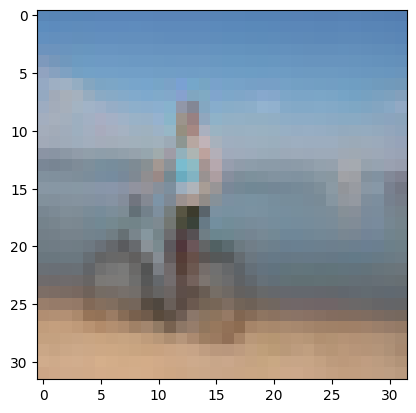

In [ ]:
plt.imshow(x_train[8])

In [ ]:
datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

### 4. Modelo ResNet

 crea una red neuronal convolucional (CNN) utilizando la arquitectura de ResNet50 preentrenada en imagenet en TensorFlow.

ResNet_model = tf.keras.applications.ResNet50(input_shape=(32,32,3), include_top=False, weights='imagenet'): Crea un modelo base de ResNet50 preentrenado en imagenet. Se especifica la forma de entrada (32,32,3) de las imágenes de entrada y se establece include_top en False para excluir la capa densa de salida de la arquitectura de ResNet50. Los pesos preentrenados de imagenet se cargan a través del argumento weights='imagenet'.

x = ResNet_model.output: Se establece la salida del modelo base como entrada de la siguiente capa.

x = tf.keras.layers.GlobalAveragePooling2D()(x): Agrega una capa de pooling global para reducir la dimensión espacial de la salida de la capa anterior a un vector de características unidimensional.

x = tf.keras.layers.Dense(100, activation='softmax')(x): Agrega una capa densa con 100 unidades (que representa el número de clases de la tarea de clasificación) y activación softmax para producir la probabilidad de pertenencia a cada clase.

model = tf.keras.Model(inputs=base_model.input, outputs=x): Crea un nuevo modelo que toma la misma entrada que el modelo base y produce la salida de la capa densa agregada.

In [ ]:
ResNet_model = tf.keras.applications.ResNet50(input_shape=(32,32,3), include_top=False, weights='imagenet')
x = ResNet_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(100, activation='softmax')(x)
model = tf.keras.Model(inputs=ResNet_model.input, outputs=x)


94765736/94765736 [==============================] - 0s 0us/step


define un modelo de red neuronal convolucional utilizando la arquitectura de ResNet50 pre-entrenada en ImageNet y muestra un resumen del modelo.

 define un modelo de red neuronal utilizando la arquitectura de ResNet50 como una capa base y varias capas densas completamente conectadas para la clasificación de 10 clases.

In [ ]:
model = tf.keras.Sequential()
model.add(ResNet_model)
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 256)               262400    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 27,000,458
Trainable params: 26,947,338
No

La función model.compile se utilizo para configurar el proceso de entrenamiento del modelo en Keras. Se deben especificar tres argumentos importantes: la función de pérdida (loss), el optimizador (optimizer) y las métricas (metrics) a utilizar para evaluar el rendimiento del modelo durante el entrenamiento y la evaluación.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8, restore_best_weights=True)

# Fit data to model
history2 = model.fit(datagen.flow(x_train, y_train, batch_size=50),
                    steps_per_epoch=x_train.shape[0] // 50,
                    epochs=25,
                    validation_data=(x_test, y_test),
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/25
100/100 [==============================] - 61s 86ms/step - loss: 1.6637 - accuracy: 0.4316 - val_loss: 7.1064 - val_accuracy: 0.1000
Epoch 2/25
100/100 [==============================] - 7s 68ms/step - loss: 1.0179 - accuracy: 0.6606 - val_loss: 9.2562 - val_accuracy: 0.0710
Epoch 3/25
100/100 [==============================] - 6s 59ms/step - loss: 0.7875 - accuracy: 0.7364 - val_loss: 9.7597 - val_accuracy: 0.0990
Epoch 4/25
100/100 [==============================] - 8s 79ms/step - loss: 0.6405 - accuracy: 0.7850 - val_loss: 6.2214 - val_accuracy: 0.1000
Epoch 5/25
100/100 [==============================] - 6s 62ms/step - loss: 0.5391 - accuracy: 0.8258 - val_loss: 5.5414 - val_accuracy: 0.1050
Epoch 6/25
100/100 [==============================] - 6s 60ms/step - loss: 0.4437 - accuracy: 0.8530 - val_loss: 9.2938 - val_accuracy: 0.1190
Epoch 7/25
100/100 [==============================] - 7s 70ms/step - loss: 0.3979 - accuracy: 0.8666 - val_loss: 3.2426 - val_accuracy: 0.225

### 5. Graficas de entrenamiento.

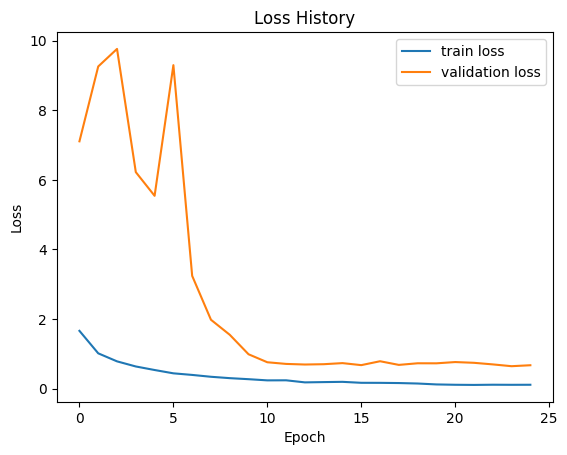

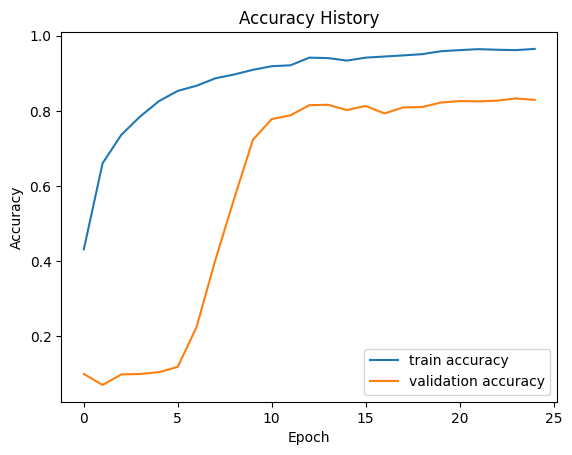

In [ ]:
# Plot the loss history
fig, ax = plt.subplots()
ax.plot(history2.history['loss'], label='train loss')
ax.plot(history2.history['val_loss'], label='validation loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Loss History')
ax.legend()
plt.show()

# Plot the accuracy history
fig, ax = plt.subplots()
ax.plot(history2.history['accuracy'], label='train accuracy')
ax.plot(history2.history['val_accuracy'], label='validation accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy History')
ax.legend()
plt.show()

### 6. Guardar

In [ ]:
model.save('models/modelo_ResNet.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


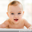

NameError: ignored

In [2]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Cargar una imagen desde Google Drive
from PIL import Image

image_path = '/content/49-bebe-de-cinco-meses-desarrollo-del-bebe-mes-a-mes.jpg'
image = Image.open(image_path)
image = image.resize((32, 32))
image.show()

# Preprocesar la imagen
import numpy as np

x = np.array(image)
x = x.reshape(1, 32, 32, 3)
x = x.astype('float32') / 255

# Realizar la predicción
prediction = model.predict(x)
predicted_label = np.argmax(prediction)


class_names = [
        'apple', # id 0
        'aquarium_fish',
        'baby',
        'bear',
        'beaver',
        'bed',
        'bee',
        'beetle',
        'bicycle',
        'bottle',
        'bowl',
        'boy',
        'bridge',
        'bus',
        'butterfly',
        'camel',
        'can',
        'castle',
        'caterpillar',
        'cattle',
        'chair',
        'chimpanzee',
        'clock',
        'cloud',
        'cockroach',
        'couch',
        'crab',
        'crocodile',
        'cup',
        'dinosaur',
        'dolphin',
        'elephant',
        'flatfish',
        'forest',
        'fox',
        'girl',
        'hamster',
        'house',
        'kangaroo',
        'computer_keyboard',
        'lamp',
        'lawn_mower',
        'leopard',
        'lion',
        'lizard',
        'lobster',
        'man',
        'maple_tree',
        'motorcycle',
        'mountain',
        'mouse',
        'mushroom',
        'oak_tree',
        'orange',
        'orchid',
        'otter',
        'palm_tree',
        'pear',
        'pickup_truck',
        'pine_tree',
        'plain',
        'plate',
        'poppy',
        'porcupine',
        'possum',
        'rabbit',
        'raccoon',
        'ray',
        'road',
        'rocket',
        'rose',
        'sea',
        'seal',
        'shark',
        'shrew',
        'skunk',
        'skyscraper',
        'snail',
        'snake',
        'spider',
        'squirrel',
        'streetcar',
        'sunflower',
        'sweet_pepper',
        'table',
        'tank',
        'telephone',
        'television',
        'tiger',
        'tractor',
        'train',
        'trout',
        'tulip',
        'turtle',
        'wardrobe',
        'whale',
        'willow_tree',
        'wolf',
        'woman',
        'worm',
       
    ]

class_name = class_names[predicted_label]
print('Etiqueta predicha:', class_name)
